<a href="https://colab.research.google.com/github/endtheme123/ML_note/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with neural network in tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter, predicting a number.

In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


##Creating data to view and fit

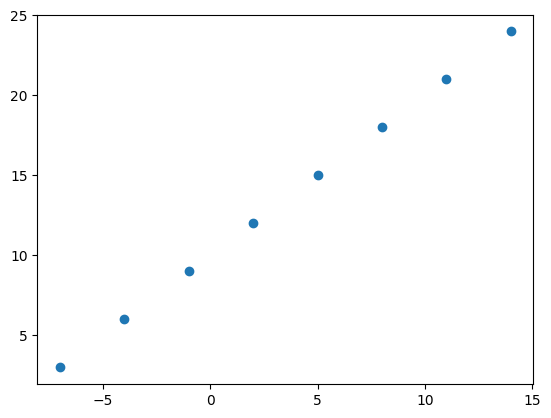

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it 
plt.scatter(X,y)


## Input and Output shapes

In [3]:
#Create a demo tensor for our housing price pridiction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
#turn our numpu arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype= tf.float32)
X, y



(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

##Steps in modeling with tf

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer ( tell our model how to improve the patterns its learning) and evaluation metrics (what we can use to inpterpret the performance of our model)

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)



In [8]:
# # Optionally, the first layer can receive an `input_shape` argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))



# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,1)))

In [9]:
#Set random seed
tf. random.set_seed(42)

#1. Create a model using the sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. compile the model

model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error 
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics = ["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X,axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 987ms/step - loss: 14.5910 - mae: 14.5910
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 14.4681 - mae: 14.4681
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 14.3507 - mae: 14.3507
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 14.2382 - mae: 14.2382
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 14.1301 - mae: 14.1301


In [10]:
#check out x and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
#try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 209ms/step


array([[-2.877159]], dtype=float32)

##improving our model

We can improve our model by altering the steps we took to create a model:

1. **creating a model**: here we might add more layers, increase the number of hidden units(neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model**: here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **fitting a model**: here we might fit a model for more epochs (leave it train for longer) or on more data (give the model more examples to learn from)


In [17]:
#lets rebuild our model

#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.legacy.Adam(lr = 0.01),
              metrics = ["mae"])


#3. Fit the model (this time we ll train for longer)

model.fit(tf.expand_dims(X, axis = -1),y,epochs = 100)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.4091 - mae: 13.4091
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 12.4355 - mae: 12.4355
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 11.4613 - mae: 11.4613
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4799 - mae: 10.4799
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 9.4856 - mae: 9.4856
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 8.4727 - mae: 8.4727
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4340 - mae: 7.4340
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7962 - mae: 6.7962
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 7.2301 - mae: 7.2301
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 7.7420 - mae: 7.7420
Epoch 11/100
1/1 [==============================] - 0s 35ms/ste

In [13]:
#remind ourselves of the data
X,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
#lets see if our model prediction has improved?
model.predict([17.0])

1/1 [==============================] - 0s 85ms/step


array([[26.10789]], dtype=float32)

## Evaluate a model

In practice, a typical workflow you go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> tweak a model -> fit it -> evaluate it ....
```

When it comes to evaluation, there are 3 words you should memorize:

```"visualize, visualize, visualize"```

it's a good idea to visualize:
* the data - what data are we working with? what does it look like?
* the model itself - what does our model look like?
* the training of a model - how does a model perform while it learns?
* the prediction of the model - how do the predictions of model line up against the ground truth(the original lables)? 

In [19]:
#make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
#make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

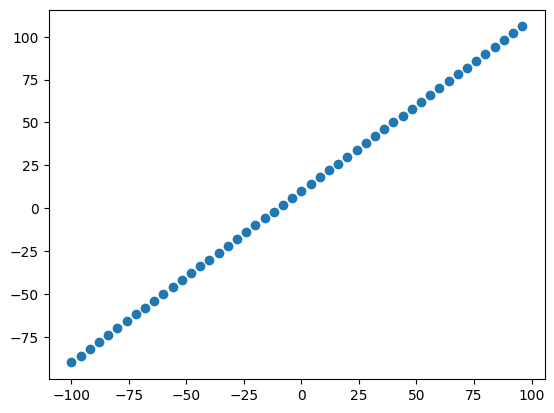

In [22]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* **Training set** -  the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model get tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [23]:
#check the length of how many sample we have
len(X)

50

In [24]:
#Split the data into train and test sets

X_train = X[:40] #first 40 are training samples(80% of the data) 
y_train = y[:40] 

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:] 

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

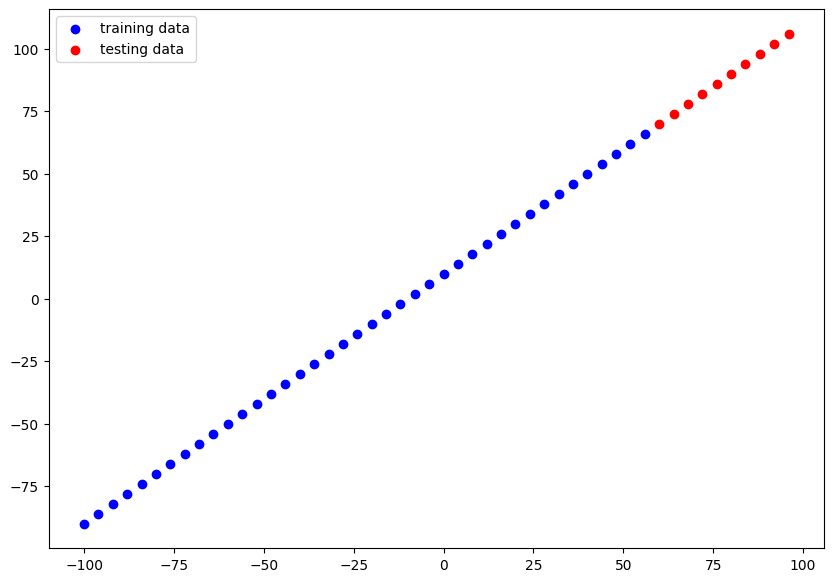

In [29]:
plt.figure(figsize = (10,7))

#plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "training data")

#plot testing data in green
plt.scatter(X_test, y_test, c="r", label = "testing data")

#Show a legend
plt.legend();

In [33]:
#Let's have a look at how to build a neural network for our data

#1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. fit the model
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 98.9384 - mae: 98.9384
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 63.4830 - mae: 63.4830
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 26.3388 - mae: 26.3388
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 11.3553 - mae: 11.3553
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 12.6115 - mae: 12.6115
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.7603 - mae: 9.7603
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.8502 - mae: 8.8502
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0951 - mae: 9.0951
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.3985 - mae: 19.3985
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4944 - mae: 10.4944
Epoch 11/100
2/2 [==============================] - 0s 9ms/s

###visualizing the model


In [34]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [36]:
X[0]

<tf.Tensor: shape=(), dtype=int32, numpy=-100>

In [58]:
# model.build()

#let's create a model that builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

#1. create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "one_of_the_many_model_we_are_going_to_build")

#2. compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [59]:
model.summary()

Model: "one_of_the_many_model_we_are_going_to_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params = total number of parameters in the model.

* Trainable parameters = these are the parameters (patterns) the model can update as it trains
* Non-trainable parameters - these parameters arent updated during training( this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [60]:
#Let's fit our model to the training data
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [44]:
#Get a summary of our model
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


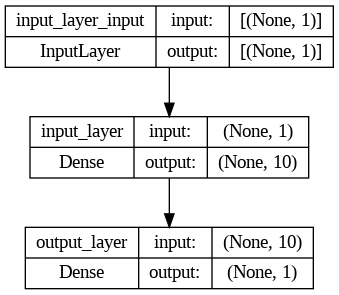

In [61]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

To visualize prediction, it is a good idea to plot them against the group truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth vs model's prediction

In [62]:
#make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 118ms/step


array([[ 69.559586],
       [ 74.08015 ],
       [ 78.60071 ],
       [ 83.12126 ],
       [ 87.641815],
       [ 92.16238 ],
       [ 96.68293 ],
       [101.20349 ],
       [105.724045],
       [110.24461 ]], dtype=float32)

In [63]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** if you feel like you are going to reuse some kind of funcionality, in the future, it is a good idea to turn it into a function

In [64]:
# let's create a plotting function
def plot_prediction (train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     prediction = y_pred
                     ):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize = (10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")

  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label = "testing data")

  #plot predicting data in red
  plt.scatter(test_data, prediction, c="r", label = "prediction")


  #show legend
  plt.legend()

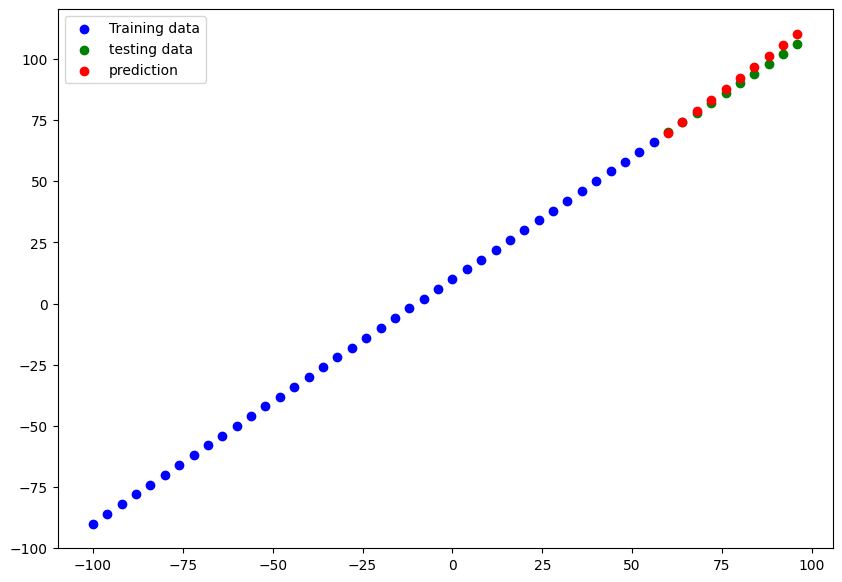

In [66]:
plot_prediction(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, prediction = y_pred)

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression, 2 of the main metrics:
* **MAE**: mean absolute error, "on average, how wrong is each of my model's predictions"

* **MSE**: mean square error, "square the average errors"

In [68]:
#Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 311ms/step - loss: 1.9902 - mae: 1.9902


[1.990179419517517, 1.990179419517517]

In [80]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true =  tf.cast(y_test, dtype = tf.float32), 
                                     y_pred = tf.squeeze(tf.constant(y_pred)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9901803>

In [83]:
y_pred = tf.squeeze(tf.constant(y_pred))
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.559586,  74.08015 ,  78.60071 ,  83.12126 ,  87.641815,
        92.16238 ,  96.68293 , 101.20349 , 105.724045, 110.24461 ],
      dtype=float32)>

In [84]:
y_test = tf.cast(y_test, dtype = tf.float32)
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [85]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9901803>

In [95]:
#Calculate the mean square error
mse = tf.keras.losses.MSE(y_true = y_test,
                          y_pred = y_pred)
mse


<tf.Tensor: shape=(), dtype=float32, numpy=5.8535624>

In [107]:
#Make some functions to reuse MAE and MSE:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = tf.cast(y_true, dtype = tf.float32),
                                        y_pred = tf.squeeze(tf.constant(y_pred)))


def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = tf.cast(y_true, dtype = tf.float32),
                                        y_pred = tf.squeeze(tf.constant(y_pred)))

### Runing experiments to improve our model

``` 
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. get more data -> get more examples for your model to train on (more oportunities to learn patterns or relationships between features and labels.)

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns int the data

let's do 3 modeling experiments:
1. `model_1`: same as the original model, 1 layer but trained for 100 epochs.

2. `model_2`: 2 layers, trained for 100 epochs

3. `model_3`: 2 layers, trained for 500 epochs

**build model 1**

In [99]:
#set random seed
tf.random.set_seed(42)

#1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

#3. fit the model
model_1.fit(tf.expand_dims(X_train,axis = -1), y_train, epochs = 100)



Epoch 1/100
2/2 [==============================] - 1s 22ms/step - loss: 52.2200 - mae: 52.2200
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 18.8285 - mae: 18.8285
Epoch 3/100
2/2 [==============================] - 0s 22ms/step - loss: 10.5395 - mae: 10.5395
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 9.6614 - mae: 9.6614
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 10.5831 - mae: 10.5831
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 9.7975 - mae: 9.7975
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 8.8789 - mae: 8.8789
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 9.0809 - mae: 9.0809
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 19.5030 - mae: 19.5030
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 10.5401 - mae: 10.5401
Epoch 11/100
2/2 [==============================] - 0s 27

1/1 [==============================] - 0s 39ms/step


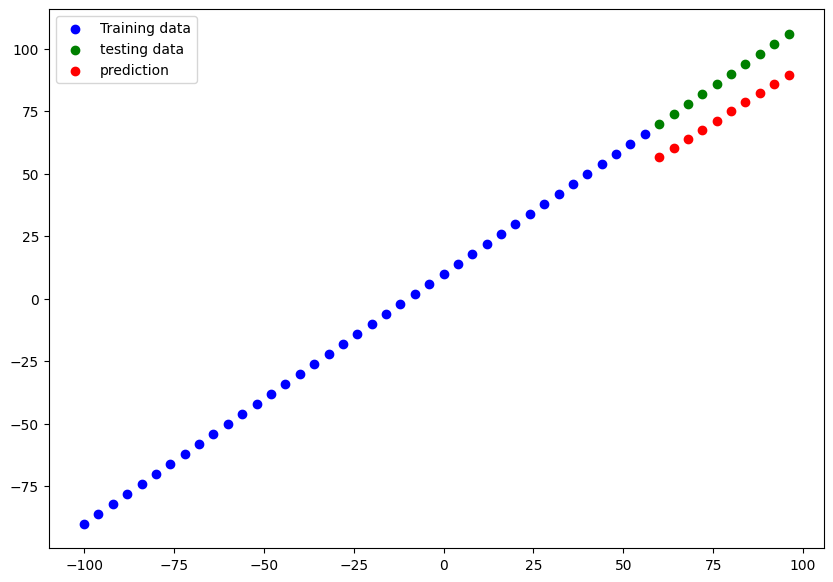

In [101]:
#visualize the results => make a plot prediction for model 1:
y_preds_1 = model_1.predict(X_test)
plot_prediction(prediction = y_preds_1)

In [108]:
#calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.919748>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.43481>)

**Build model 2**

* 2 dense layers, trained for 100 epochs

In [127]:
#set seed
tf.random.set_seed(42)

#1. create model 2:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model:
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])



#3. fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 36.5145 - mse: 1916.0883
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 26.3726 - mse: 912.1829
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 32.2955 - mse: 1536.4524
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 24.0509 - mse: 834.8914
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 14.3035 - mse: 251.4383
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4237 - mse: 148.3972
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4542 - mse: 203.6693
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 10.9636 - mse: 144.0286
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 38.9498 - mse: 2364.6475
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 26.5405 - mse: 990.1827
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 72ms/step


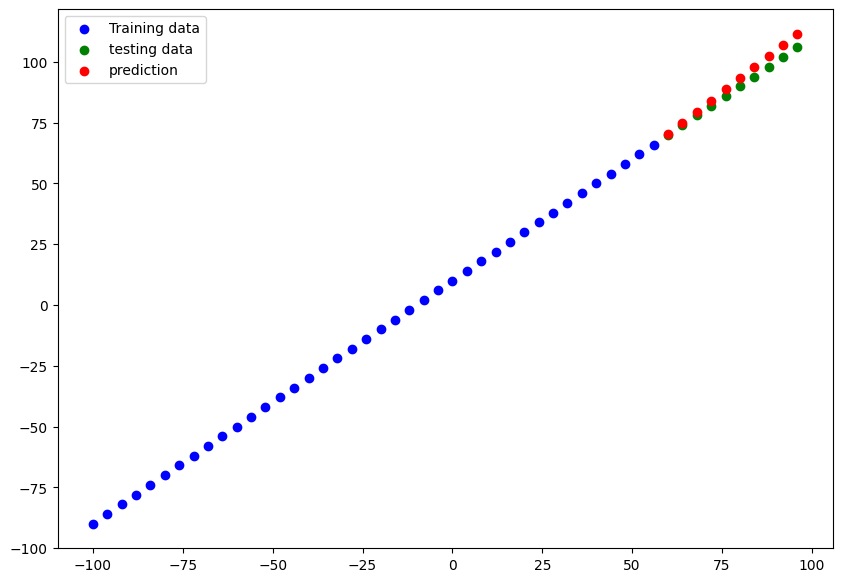

In [128]:
#Visualize the results -> plot prediction:
y_preds_2 = model_2.predict(X_test)
# y_preds_2
plot_prediction(prediction = y_preds_2)

In [116]:
#evaluating the model:
mae_2 = mae(y_test, y_pred)
mse_2 = mse(y_test,y_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9901803>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.8535624>)

**Build model 3**
* 2 dense layers, trained for 500 epochs

In [143]:
#set random seed
tf.random.set_seed(42)

#1. create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.SGD(),
                metrics = ["mse"])

#3. fit the model
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 45.2802 - mse: 2983.1475
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 30.2821 - mse: 1204.5486
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 34.9342 - mse: 1849.3689
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 29.2776 - mse: 1269.3761
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 15.8440 - mse: 329.4248
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 12.5523 - mse: 205.1873
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 11.8089 - mse: 172.7667
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 12.8563 - mse: 224.9410
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 33.7525 - mse: 1703.1149
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 23.0826 - mse: 744.7629
Epoch 11/500
2/2 [=====================

1/1 [==============================] - 0s 69ms/step


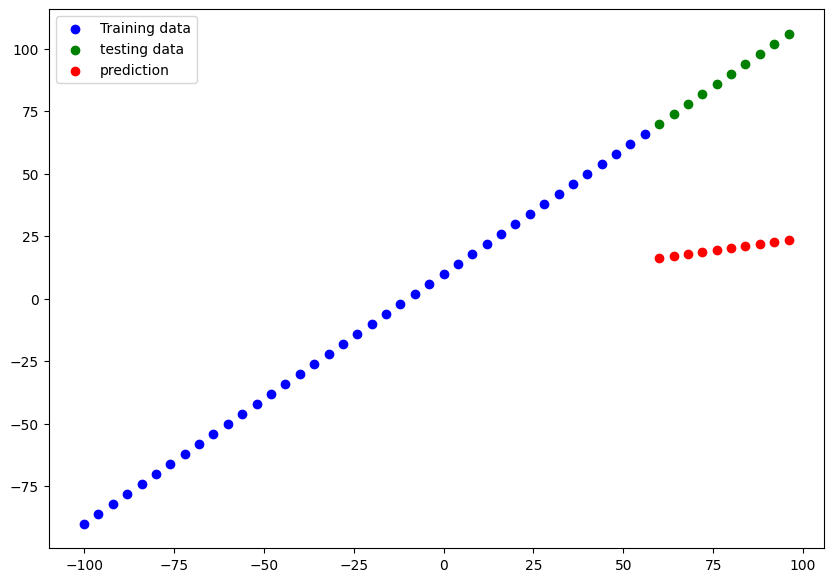

In [144]:
#visulization -> plot prediction

y_preds_3 = model_3.predict(X_test)
plot_prediction(prediction = y_preds_3)

In [145]:
#evaluate the model:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3




(<tf.Tensor: shape=(), dtype=float32, numpy=68.00726>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4709.6963>)

**Note:** you want to start with small experiments (small models) and make sure they work and then increase their scale if necessary.

##Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [150]:
#Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model","mae","mse"])

all_results


,model,mae,mse
0,model_1,14.919748,223.434814
1,model_2,1.990180,5.853562
2,model_3,68.007263,4709.696289


Looks like model_2 perform best

In [151]:
model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **note:** one of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which dont work and in turn, get closer to figuring our what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## tracking your experiments

one really good habit in machine learning modeling is to track the results of your experiments.

and when doing so, it can be tedious if you're running lots of experiments.

luckily, there are tools to help us!

**resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later)
* Weights & biases -  a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard



##Saving our models

Saving our models allows us to use them outside of google colab (or whenever they were trained) such as in a web application or a mobile app

There are 2 main formats we can save our model to:
1. The SavedModel format
2. The HDF5 format

In [154]:
# Save model using the SaveModel format

model_2.save("Best_model_SavedModel_format")

In [155]:
#save model using the HDF5 format

model_2.save("best_model_HDF5_format.h5")

##Loading in a saved model


In [158]:
# load in the SavedModel format model

loaded_SavedModel_format = tf.keras.models.load_model("/content/Best_model_SavedModel_format")
loaded_SavedModel_format.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [159]:
model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [161]:
#compare model_2 predictions with SavedModel format model predictions

model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 49ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [163]:
#compare the MAE of model_2 preds and loaded_SaveModel_preds
mae(y_true = y_test, y_pred = model_2_preds) == mae(y_true = y_test, y_pred = loaded_SavedModel_format_preds)


<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [164]:
#load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [165]:
model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [166]:
#check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 60ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

##Download a model or any other files from google colab

If you want download your files from Google colab:
1. you can go to the "files" tabs and right click on the file you're after and click "download"

2. Use code (see the cell below).

3. Save it to google drive by connecting google drive and copying it there ( see 2nd cell below)

In [167]:
#download a file from google colab
from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [168]:
#save a file from google colab to google drive (requires mounting google drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Tensorflow_course

In [169]:
!ls /content/drive/MyDrive/Tensorflow_course

best_model_HDF5_format.h5


## **Larger Example**

In [170]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [172]:
#import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [174]:
#read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [177]:
insurance["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [182]:
#let's try 1 hot encode our data frame so it's all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [183]:
#Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [195]:
#view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [185]:
#view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [187]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [190]:
#Build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

#1. create a model
insurance_model = tf.keras.Sequential ([
    tf.keras.layers.Dense(10),
    
    tf.keras.layers.Dense(1)
])

#2. compile the model

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#3. fit the model
insurance_model.fit(X_train, y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 8718.2881 - mae: 8718.2881
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7870.3589 - mae: 7870.3589
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7598.5474 - mae: 7598.5474
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7686.4185 - mae: 7686.4185
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7689.8940 - mae: 7689.8940
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7644.7061 - mae: 7644.7061
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7526.2646 - mae: 7526.2646
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.1743 - mae: 7748.1743
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7489.1587 - mae: 7489.1587
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7682.4824 - mae: 7682.4824

In [191]:
#check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7431.8447 - mae: 7431.8447


[7431.8447265625, 7431.8447265625]

In [194]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

right now it looks like our model isnt performing too well => improve it

To (try) improve our model, we'll run 2 experiments:
1. add an extra layer with more hidden units and use the Adam optimizer
2. same as above but train for longer 200 epochs
3. insert your own experments here

In [203]:
#set random seed
tf.random.set_seed(42)

#1. create the model
insurance_model_2 = tf.keras.Sequential ([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


#2. compile our model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                           optimizer = tf.keras.optimizers.legacy.Adam(),
                           metrics = ["mae"])


#3. fitting the model

insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13277.0703 - mae: 13277.0703
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13122.2402 - mae: 13122.2402
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12803.4717 - mae: 12803.4717
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12175.9873 - mae: 12175.9873
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11106.0469 - mae: 11106.0469
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9686.5830 - mae: 9686.5830
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8319.6221 - mae: 8319.6221
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7588.2168 - mae: 7588.2168
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7444.6924 - mae: 7444.6924
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7422.1997 - mae:

In [204]:
#Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4951.7119 - mae: 4951.7119


[4951.7119140625, 4951.7119140625]

In [212]:
#Set the random seed
tf.random.set_seed(42)

#1. create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                          metrics = ["mae"])

#3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13318.3926 - mae: 13318.3926
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13223.6777 - mae: 13223.6777
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12990.8125 - mae: 12990.8125
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12487.1045 - mae: 12487.1045
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 11558.9873 - mae: 11558.9873
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 10151.0234 - mae: 10151.0234
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 8605.9932 - mae: 8605.9932
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7581.0752 - mae: 7581.0752
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7346.7021 - mae: 7346.7021
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7323.6577 - ma

In [206]:
#Evaluate the third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 1s 5ms/step - loss: 3480.4663 - mae: 3480.4663


[3480.46630859375, 3480.46630859375]

Text(0.5, 0, 'epochs')

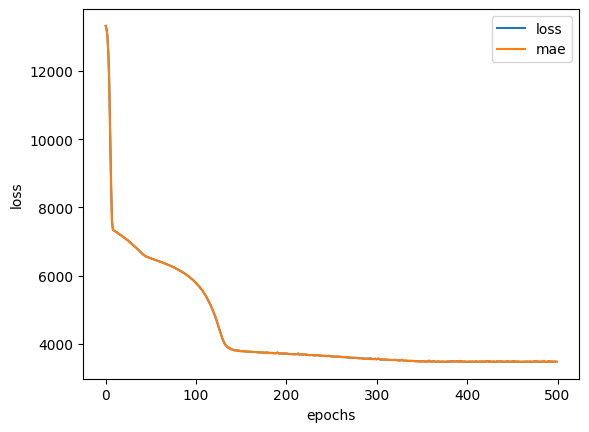

In [213]:
#plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


**Question:** how long should you train for?

It depends. Really.., it depends on the problem you're working on. However, many people have asked this question before... s0 TensorFlow has a solution! It's called the EarlyStoppingCallback, Which is a tensorflow component you can add to your model to stop training once it stops improving a certain metric

##Preprocessing data(normalization and standardization)

In terms of scaling values, neural network tend to prefer normalization.

if you're sure not on which to use, you could try both and see which performs better.

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


#Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [214]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

To prepare our data, we can borrow a few classes from Scikit-learn

In [221]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


#Create a column transformer 
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), #turn all values in these columns into between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

#Create X & y 
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

#Fit the column transformer  to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [222]:
#what does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [226]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [227]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! our data has been normalize and one hot encoded => let's build a neural network model on it and see how it goes

In [232]:
insurance_model_2.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 100)               1200      
                                                                 
 dense_58 (Dense)            (None, 10)                1010      
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [231]:
#Build a neural network to fit on our normalized data

#set seed
tf.random.set_seed(42)

#1. Create the model
final_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#2. compile the model

final_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.legacy.Adam(),
    metrics = ["mae"]
)

#3. fit the model
final_model.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 13344.0508 - mae: 13344.0508
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13336.7158 - mae: 13336.7158
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 13317.5801 - mae: 13317.5801
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13276.5557 - mae: 13276.5557
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13202.6143 - mae: 13202.6143
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 13084.7930 - mae: 13084.7930
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 12912.8525 - mae: 12912.8525
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 12676.6152 - mae: 12676.6152
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 12365.7812 - mae: 12365.7812
Epoch 10/200
34/34 [==============================] - 0s 6ms/step - loss: 11974.45

In [234]:
#evaluate our model trained on normalized data
final_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3170.0417 - mae: 3170.0417


[3170.041748046875, 3170.041748046875]

<Axes: ylabel='Frequency'>

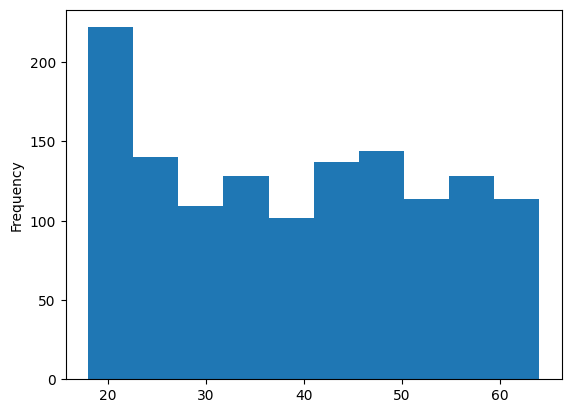

In [217]:
X["age"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

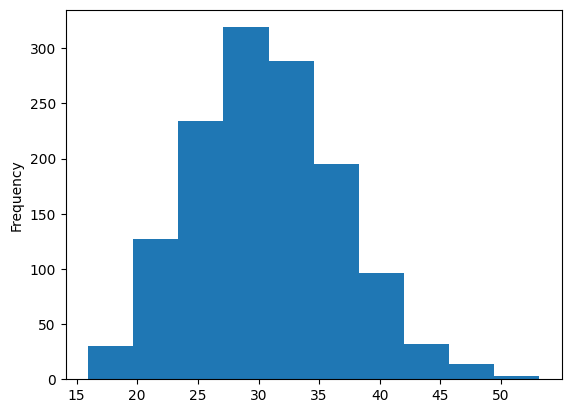

In [218]:
X["bmi"].plot(kind = "hist")

In [219]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64